In [1]:
# Core
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# Display
pd.options.display.float_format = "{:,.2f}".format


In [ ]:
df.head()

,ANSR / Tech Revenue FYTD,AR Outstanding,Billed Expenses FYTD,Billed Fees FYTD,Billed Revenue Days,Charged Hours FYTD,Client,Client ID,EAF Reserve FYTD,ETD Total Collections,Engagement Partner,Engagement Sub Service Line,Expenses FYTD,FYTD Collections,FYTD Labor Costs,FYTD Unbilled Expenses,Location,MS,NUI ETD,Total Billed FYTD,Unbilled Revenue Days,Month,Week,Year
0,0.00,0.00,0.00,0.00,0.00,0.00,QUEST GLOBAL SERVICES PTE. LTD.,11421164,0.00,0.00,"Ghosh, Subh",Audit,0.00,0.00,0.00,0.00,Bangalore,TMT,0.00,0.00,0.00,03 Sep,10,FY24
1,0.00,0.00,0.00,0.00,0.00,0.00,Industrial Energy Limited,11881305,0.00,0.00,"Agarwal, Sanjay",Audit,0.00,0.00,0.00,0.00,East,IIC,0.00,0.00,0.00,03 Sep,10,FY24
2,0.00,0.00,0.00,0.00,0.00,0.00,Vini Cosmetics Private Limited,11453641,0.00,0.00,"Kalia, Chaitanya",CCaSS,0.00,0.00,0.00,0.00,Mumbai,IIC,0.00,0.00,0.00,03 Sep,10,FY24
3,0.00,0.00,0.00,0.00,0.00,0.00,UNIPHORE SOFTWARE SYSTEMS PRIVATE LIMITED,12239544,0.00,0.00,"Agrawal, Ayush",FAAS,0.00,0.00,0.00,0.00,Delhi,TMT,0.00,0.00,0.00,03 Sep,10,FY24
4,0.00,0.00,0.00,0.00,0.00,0.00,THE TATA POWER COMPANY LIMITED,11230405,0.00,0.00,"Kalia, Chaitanya",CCaSS,0.00,0.00,0.00,0.00,Mumbai,IIC,0.00,0.00,0.00,03 Sep,10,FY24


In [270]:
train_df = pd.read_parquet("FY24FY25.parquet")
test_df  = pd.read_parquet("FY26.parquet")

df = pd.concat([train_df, test_df], ignore_index=True)

print("Shape:", df.shape)
df.head()


Shape: (2986151, 24)


,ANSR / Tech Revenue FYTD,AR Outstanding,Billed Expenses FYTD,Billed Fees FYTD,Billed Revenue Days,Charged Hours FYTD,Client,Client ID,EAF Reserve FYTD,ETD Total Collections,Engagement Partner,Engagement Sub Service Line,Expenses FYTD,FYTD Collections,FYTD Labor Costs,FYTD Unbilled Expenses,Location,MS,NUI ETD,Total Billed FYTD,Unbilled Revenue Days,Month,Week,Year
0,0.00,0.00,0.00,0.00,0.00,0.00,QUEST GLOBAL SERVICES PTE. LTD.,11421164,0.00,0.00,"Ghosh, Subh",Audit,0.00,0.00,0.00,0.00,Bangalore,TMT,0.00,0.00,0.00,03 Sep,10,FY24
1,0.00,0.00,0.00,0.00,0.00,0.00,Industrial Energy Limited,11881305,0.00,0.00,"Agarwal, Sanjay",Audit,0.00,0.00,0.00,0.00,East,IIC,0.00,0.00,0.00,03 Sep,10,FY24
2,0.00,0.00,0.00,0.00,0.00,0.00,Vini Cosmetics Private Limited,11453641,0.00,0.00,"Kalia, Chaitanya",CCaSS,0.00,0.00,0.00,0.00,Mumbai,IIC,0.00,0.00,0.00,03 Sep,10,FY24
3,0.00,0.00,0.00,0.00,0.00,0.00,UNIPHORE SOFTWARE SYSTEMS PRIVATE LIMITED,12239544,0.00,0.00,"Agrawal, Ayush",FAAS,0.00,0.00,0.00,0.00,Delhi,TMT,0.00,0.00,0.00,03 Sep,10,FY24
4,0.00,0.00,0.00,0.00,0.00,0.00,THE TATA POWER COMPANY LIMITED,11230405,0.00,0.00,"Kalia, Chaitanya",CCaSS,0.00,0.00,0.00,0.00,Mumbai,IIC,0.00,0.00,0.00,03 Sep,10,FY24


In [3]:
weekly_fytd = (
    df.groupby(["Year", "Week"])["ANSR / Tech Revenue FYTD"]
      .sum()
      .reset_index()
)

# Keep valid week numbers only
weekly_fytd = weekly_fytd[weekly_fytd["Week"].between(1, 52)]


In [4]:
fy24 = weekly_fytd[weekly_fytd["Year"].astype(str).str.contains("24")][
    ["Week", "ANSR / Tech Revenue FYTD"]
].rename(columns={"ANSR / Tech Revenue FYTD": "FY24"})

fy25 = weekly_fytd[weekly_fytd["Year"].astype(str).str.contains("25")][
    ["Week", "ANSR / Tech Revenue FYTD"]
].rename(columns={"ANSR / Tech Revenue FYTD": "FY25"})

fy26 = weekly_fytd[weekly_fytd["Year"].astype(str).str.contains("26")][
    ["Week", "ANSR / Tech Revenue FYTD"]
].rename(columns={"ANSR / Tech Revenue FYTD": "FY26"})


In [5]:
fy25_plot = fy25.sort_values("Week").copy()

# Start FY25 from week 3
fy25_plot.loc[fy25_plot["Week"] < 3, "FY25"] = np.nan

# Fix known spike at week 34
w = 34
prev_val = fy25_plot.loc[fy25_plot["Week"] == w - 1, "FY25"].values
next_val = fy25_plot.loc[fy25_plot["Week"] == w + 1, "FY25"].values

if len(prev_val) and len(next_val):
    fy25_plot.loc[fy25_plot["Week"] == w, "FY25"] = (
        prev_val[0] + next_val[0]
    ) / 2


In [274]:
fytd_table.head()

,Week,FY24 FYTD (₹),FY25 FYTD (₹),FY26 FYTD (₹),FY24_Weekly_Inc,FY25_Weekly_Inc,FY26_Weekly_Inc
0,1,NaN,NaN,NaN,NaN,NaN,NaN
1,2,"595,146,955.74",NaN,NaN,NaN,NaN,NaN
2,3,"896,384,585.76","1,832,907,369.54","966,836,957.51","301,237,630.02",NaN,NaN
3,4,"1,255,661,249.62","2,777,030,141.90","1,352,008,364.07","359,276,663.86","944,122,772.36","385,171,406.56"
4,5,NaN,"3,628,741,036.68","1,844,864,435.29",NaN,"851,710,894.78","492,856,071.23"


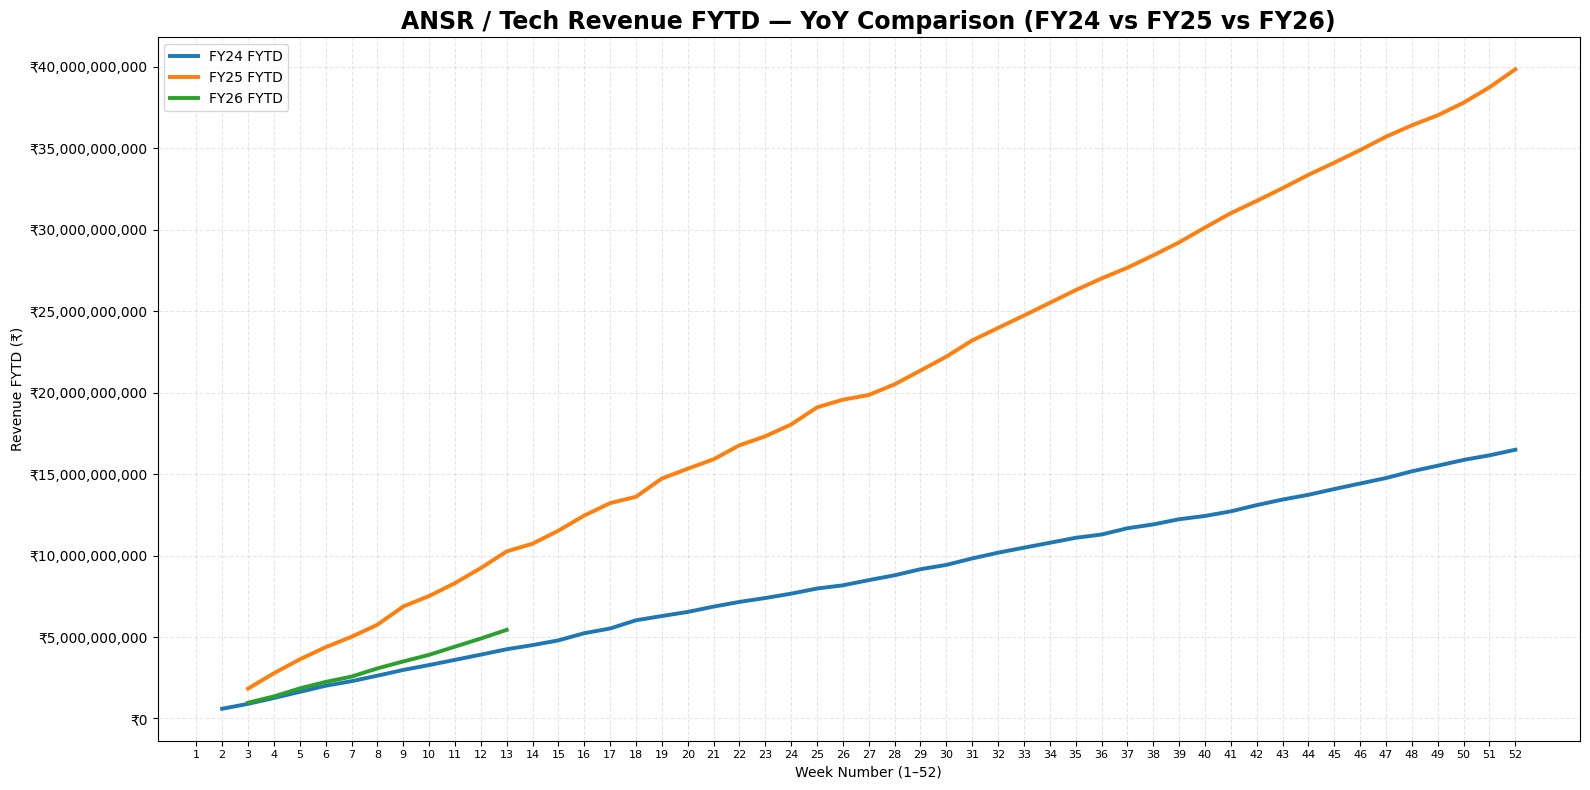

,Week,FY24 FYTD (₹),FY25 FYTD (₹),FY26 FYTD (₹)
0,1,NaN,NaN,NaN
1,2,"595,146,955.74",NaN,NaN
2,3,"896,384,585.76","1,832,907,369.54","966,836,957.51"
3,4,"1,255,661,249.62","2,777,030,141.90","1,352,008,364.07"
4,5,NaN,"3,628,741,036.68","1,844,864,435.29"
5,6,"2,007,916,702.01","4,374,179,009.44","2,242,474,275.42"
6,7,"2,286,815,056.52","5,013,446,871.36","2,569,416,301.04"
7,8,"2,624,209,199.40","5,753,450,644.34","3,071,510,031.32"
8,9,"2,978,040,295.93","6,872,024,185.72","3,500,054,996.89"
9,10,"3,277,722,262.99","7,517,417,735.98","3,905,335,926.80"


In [ ]:
plt.figure(figsize=(16,8))

plt.plot(fy24["Week"], fy24["FY24"], label="FY24 FYTD", linewidth=2.8)
plt.plot(fy25_plot["Week"], fy25_plot["FY25"], label="FY25 FYTD", linewidth=2.8)
plt.plot(fy26["Week"], fy26["FY26"], label="FY26 FYTD", linewidth=2.8)

plt.gca().yaxis.set_major_formatter(
    mtick.StrMethodFormatter("₹{x:,.0f}")
)

plt.title(
    "ANSR / Tech Revenue FYTD — YoY Comparison (FY24 vs FY25 vs FY26)",
    fontsize=17,
    weight="bold"
)

plt.xlabel("Week Number (1–52)")
plt.ylabel("Revenue FYTD (₹)")
plt.xticks(range(1, 53), fontsize=8)
plt.grid(alpha=0.3, linestyle="--")
plt.legend()

plt.tight_layout()
plt.show()


weeks = pd.DataFrame({"Week": range(1, 53)})

fytd_table = (
    weeks
    .merge(fy24, on="Week", how="left")
    .merge(fy25_plot[["Week", "FY25"]], on="Week", how="left")
    .merge(fy26, on="Week", how="left")
)

fytd_table.columns = [
    "Week",
    "FY24 FYTD (₹)",
    "FY25 FYTD (₹)",
    "FY26 FYTD (₹)"
]

fytd_table.head(15)



Browser rendering 

In [272]:
import plotly.graph_objects as go
import plotly.io as pio

# Force browser rendering (no notebook dependency issues)
pio.renderers.default = "browser"

fig = go.Figure()

# ---------- FY24 ----------
fig.add_trace(go.Scatter(
    x=fy24["Week"],
    y=fy24["FY24"],
    mode="lines",
    name="FY24",
    line=dict(width=3, color="#4C78A8"),
    hovertemplate=(
        "<b>FY24</b><br>"
        "Week %{x}<br>"
        "FYTD Revenue: ₹%{y:,.0f}"
        "<extra></extra>"
    )
))

# ---------- FY25 (cleaned) ----------
fig.add_trace(go.Scatter(
    x=fy25_plot["Week"],
    y=fy25_plot["FY25"],
    mode="lines",
    name="FY25",
    line=dict(width=3, color="#F58518"),
    hovertemplate=(
        "<b>FY25</b><br>"
        "Week %{x}<br>"
        "FYTD Revenue: ₹%{y:,.0f}"
        "<extra></extra>"
    )
))

# ---------- FY26 ----------
fig.add_trace(go.Scatter(
    x=fy26["Week"],
    y=fy26["FY26"],
    mode="lines",
    name="FY26",
    line=dict(width=3, color="#54A24B"),
    hovertemplate=(
        "<b>FY26</b><br>"
        "Week %{x}<br>"
        "FYTD Revenue: ₹%{y:,.0f}"
        "<extra></extra>"
    )
))

# ---------- Layout ----------
fig.update_layout(
    title=dict(
        text="ANSR / Tech Revenue FYTD — YoY Trend Comparison",
        x=0.5,
        font=dict(size=22, color="#EAEAEA")
    ),

    xaxis=dict(
        title="Week Number",
        tickmode="linear",
        tick0=1,
        dtick=1,
        tickfont=dict(color="#BDBDBD"),
        showgrid=False
    ),

    yaxis=dict(
        title="ANSR / Tech Revenue FYTD (₹)",
        tickformat=",",
        tickfont=dict(color="#BDBDBD"),
        gridcolor="rgba(255,255,255,0.08)",
        showgrid=True
    ),

    legend=dict(
        orientation="h",
        yanchor="bottom",
        y=1.05,
        xanchor="center",
        x=0.5,
        font=dict(size=13, color="#EAEAEA")
    ),

    hovermode="x unified",

    plot_bgcolor="#121212",
    paper_bgcolor="#121212",

    width=1250,
    height=650,
    margin=dict(l=70, r=40, t=90, b=60)
)

fig.show()


KeyError: 'Week'

In [ ]:
# =========================================================
# 📈 Weekly Increment from FYTD (same as earlier logic)
# =========================================================

fytd_table["FY24_Weekly_Inc"] = fytd_table["FY24 FYTD (₹)"].diff()
fytd_table["FY25_Weekly_Inc"] = fytd_table["FY25 FYTD (₹)"].diff()
fytd_table["FY26_Weekly_Inc"] = fytd_table["FY26 FYTD (₹)"].diff()

# Handle Week 1 reset (FYTD starts fresh)
fytd_table.loc[fytd_table["Week"] == 1, [
    "FY24_Weekly_Inc",
    "FY25_Weekly_Inc",
    "FY26_Weekly_Inc"
]] = fytd_table.loc[fytd_table["Week"] == 1, [
    "FY24 FYTD (₹)",
    "FY25 FYTD (₹)",
    "FY26 FYTD (₹)"
]]

fytd_table.head(20)


,Week,FY24 FYTD (₹),FY25 FYTD (₹),FY26 FYTD (₹),FY24_Weekly_Inc,FY25_Weekly_Inc,FY26_Weekly_Inc
0,1,NaN,NaN,NaN,NaN,NaN,NaN
1,2,"595,146,955.74",NaN,NaN,NaN,NaN,NaN
2,3,"896,384,585.76","1,832,907,369.54","966,836,957.51","301,237,630.02",NaN,NaN
3,4,"1,255,661,249.62","2,777,030,141.90","1,352,008,364.07","359,276,663.86","944,122,772.36","385,171,406.56"
4,5,NaN,"3,628,741,036.68","1,844,864,435.29",NaN,"851,710,894.78","492,856,071.23"
5,6,"2,007,916,702.01","4,374,179,009.44","2,242,474,275.42",NaN,"745,437,972.76","397,609,840.12"
6,7,"2,286,815,056.52","5,013,446,871.36","2,569,416,301.04","278,898,354.51","639,267,861.92","326,942,025.62"
7,8,"2,624,209,199.40","5,753,450,644.34","3,071,510,031.32","337,394,142.88","740,003,772.98","502,093,730.27"
8,9,"2,978,040,295.93","6,872,024,185.72","3,500,054,996.89","353,831,096.53","1,118,573,541.38","428,544,965.57"
9,10,"3,277,722,262.99","7,517,417,735.98","3,905,335,926.80","299,681,967.06","645,393,550.26","405,280,929.92"


In [268]:
fytd_table.head(20)

,Week,FY24 FYTD (₹),FY25 FYTD (₹),FY26 FYTD (₹),FY24_Weekly_Inc,FY25_Weekly_Inc,FY26_Weekly_Inc
0,1,NaN,NaN,NaN,NaN,NaN,NaN
1,2,"595,146,955.74",NaN,NaN,NaN,NaN,NaN
2,3,"896,384,585.76","1,832,907,369.54","966,836,957.51","301,237,630.02",NaN,NaN
3,4,"1,255,661,249.62","2,777,030,141.90","1,352,008,364.07","359,276,663.86","944,122,772.36","385,171,406.56"
4,5,NaN,"3,628,741,036.68","1,844,864,435.29",NaN,"851,710,894.78","492,856,071.23"
5,6,"2,007,916,702.01","4,374,179,009.44","2,242,474,275.42",NaN,"745,437,972.76","397,609,840.12"
6,7,"2,286,815,056.52","5,013,446,871.36","2,569,416,301.04","278,898,354.51","639,267,861.92","326,942,025.62"
7,8,"2,624,209,199.40","5,753,450,644.34","3,071,510,031.32","337,394,142.88","740,003,772.98","502,093,730.27"
8,9,"2,978,040,295.93","6,872,024,185.72","3,500,054,996.89","353,831,096.53","1,118,573,541.38","428,544,965.57"
9,10,"3,277,722,262.99","7,517,417,735.98","3,905,335,926.80","299,681,967.06","645,393,550.26","405,280,929.92"


In [77]:
# Start from your existing fytd_table
inc_plot = fytd_table.sort_values("Week").copy()

# Weekly increment = week-over-week change
inc_plot["FY24_Weekly_Inc"] = inc_plot["FY24 FYTD (₹)"].diff()
inc_plot["FY25_Weekly_Inc"] = inc_plot["FY25 FYTD (₹)"].diff()

# Handle Week 1 reset properly
inc_plot.loc[inc_plot["Week"] == 1, "FY24_Weekly_Inc"] = inc_plot.loc[
    inc_plot["Week"] == 1, "FY24 FYTD (₹)"
]

inc_plot.loc[inc_plot["Week"] == 1, "FY25_Weekly_Inc"] = inc_plot.loc[
    inc_plot["Week"] == 1, "FY25 FYTD (₹)"
]




In [99]:
# plt.figure(figsize=(16,8))

# # FY24 Weekly Increment
# plt.plot(
#     inc_plot["Week"],
#     inc_plot["FY24_Weekly_Inc"],
#     label="FY24 Weekly Increment",
#     linewidth=2.5,
#     color="#1f77b4",
#     alpha=0.85
# )

# # FY25 Weekly Increment
# plt.plot(
#     inc_plot["Week"],
#     inc_plot["FY25_Weekly_Inc"],
#     label="FY25 Weekly Increment",
#     linewidth=2.8,
#     color="#ff7f0e"
# )

# # Zero baseline (critical for increment analysis)
# plt.axhline(
#     0,
#     color="black",
#     linewidth=1.2,
#     alpha=0.7
# )

# # Axis formatting
# plt.gca().yaxis.set_major_formatter(
#     mtick.StrMethodFormatter("₹{x:,.0f}")
# )

# plt.title(
#     "ANSR / Tech Revenue — Weekly Increment Comparison (FY24 vs FY25)",
#     fontsize=17,
#     weight="bold"
# )

# plt.xlabel("Week Number (1–52)")
# plt.ylabel("Weekly Revenue Change (₹)")

# plt.xticks(range(1, 53), fontsize=8)
# plt.grid(alpha=0.3, linestyle="--")
# plt.legend()

# plt.tight_layout()
# # plt.show()


In [73]:
# Ensure full week index
weeks = pd.DataFrame({"Week": range(1, 53)})

inc_plot_full = (
    weeks
    .merge(inc_plot, on="Week", how="left")
)


In [74]:
inc_plot_full["FY24_Weekly_Inc"] = (
    inc_plot_full["FY24_Weekly_Inc"]
    .interpolate(method="linear")
)

inc_plot_full["FY25_Weekly_Inc"] = (
    inc_plot_full["FY25_Weekly_Inc"]
    .interpolate(method="linear")
)


In [95]:
# Identify weeks where FY25 < FY24
underperf_mask = inc_plot_full["FY25_Weekly_Inc"] < inc_plot_full["FY24_Weekly_Inc"]

underperf_weeks = inc_plot_full.loc[underperf_mask, "Week"]
underperf_values = inc_plot_full.loc[underperf_mask, "FY25_Weekly_Inc"]


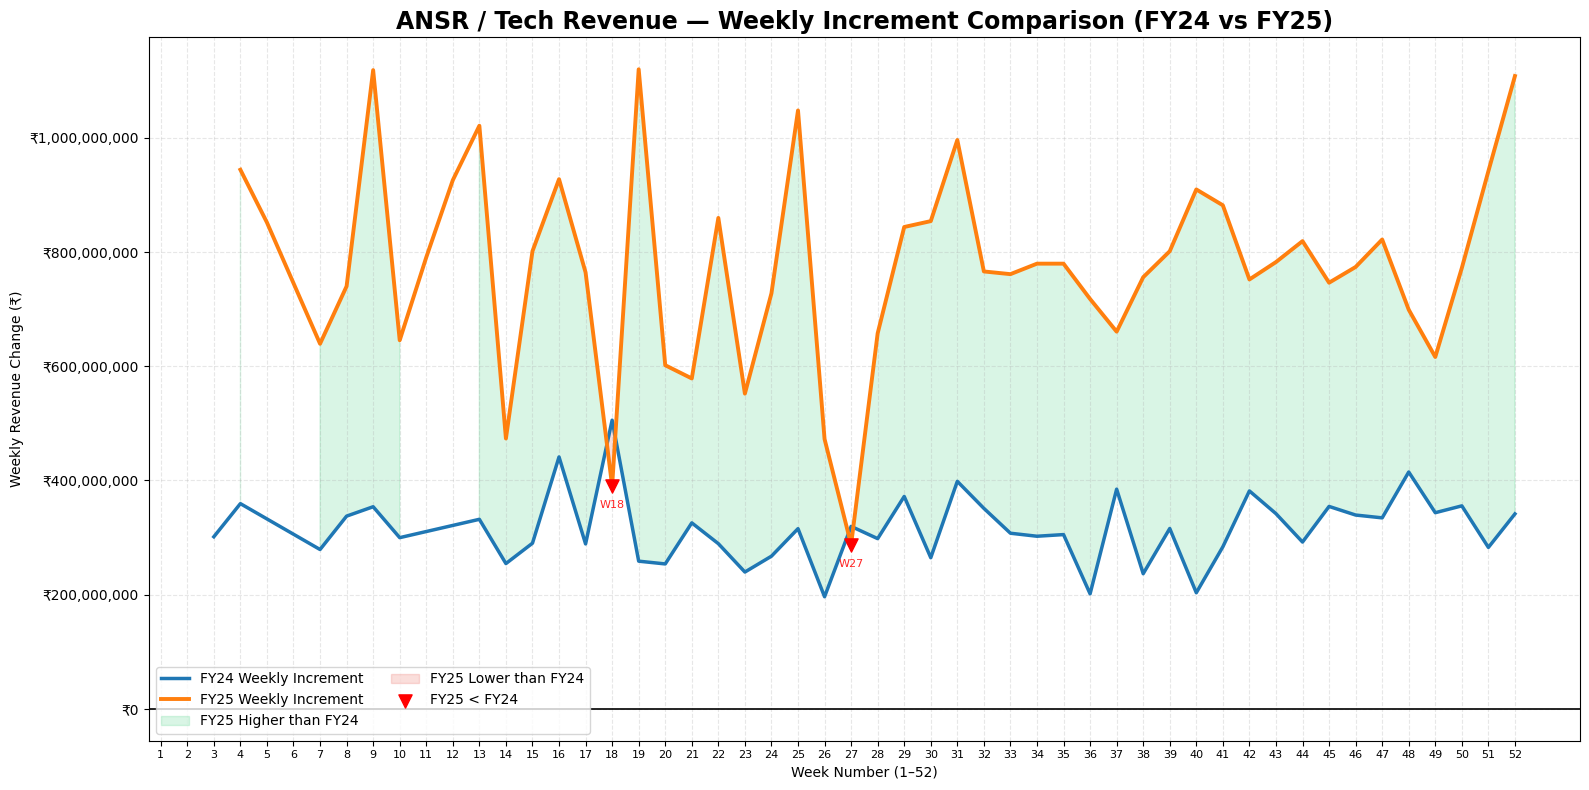

In [96]:
plt.figure(figsize=(16,8))

plt.plot(
    inc_plot_full["Week"],
    inc_plot_full["FY24_Weekly_Inc"],
    label="FY24 Weekly Increment",
    linewidth=2.5
)

plt.plot(
    inc_plot_full["Week"],
    inc_plot_full["FY25_Weekly_Inc"],
    label="FY25 Weekly Increment",
    linewidth=2.8
)

plt.axhline(0, color="black", linewidth=1.2)

plt.fill_between(
    inc_plot["Week"],
    inc_plot["FY24_Weekly_Inc"],
    inc_plot["FY25_Weekly_Inc"],
    where=(inc_plot["FY25_Weekly_Inc"] > inc_plot["FY24_Weekly_Inc"]),
    interpolate=True,
    color="#2ecc71",   # soft green
    alpha=0.18,
    label="FY25 Higher than FY24"
)

plt.fill_between(
    inc_plot["Week"],
    inc_plot["FY24_Weekly_Inc"],
    inc_plot["FY25_Weekly_Inc"],
    where=(inc_plot["FY25_Weekly_Inc"] < inc_plot["FY24_Weekly_Inc"]),
    interpolate=True,
    color="#e74c3c",   # soft red
    alpha=0.18,
    label="FY25 Lower than FY24"
)
# 🔻 Indicator where FY25 drops below FY24
plt.scatter(
    underperf_weeks,
    underperf_values,
    color="red",
    marker="v",       # downward triangle
    s=90,
    zorder=5,
    label="FY25 < FY24"
)


plt.gca().yaxis.set_major_formatter(
    mtick.StrMethodFormatter("₹{x:,.0f}")
)

plt.title(
    "ANSR / Tech Revenue — Weekly Increment Comparison (FY24 vs FY25)",
    fontsize=17,
    weight="bold"
)

for w, v in zip(underperf_weeks, underperf_values):
    plt.text(
        w,
        v - 25_000_000,      # slight offset downward
        f"W{int(w)}",
        fontsize=8,
        color="red",
        ha="center",
        va="top",
        alpha=0.85
    )


plt.xlabel("Week Number (1–52)")
plt.ylabel("Weekly Revenue Change (₹)")
plt.xticks(range(1, 53), fontsize=8)
plt.grid(alpha=0.3, linestyle="--")
plt.legend(ncol=2)

plt.tight_layout()
plt.show()


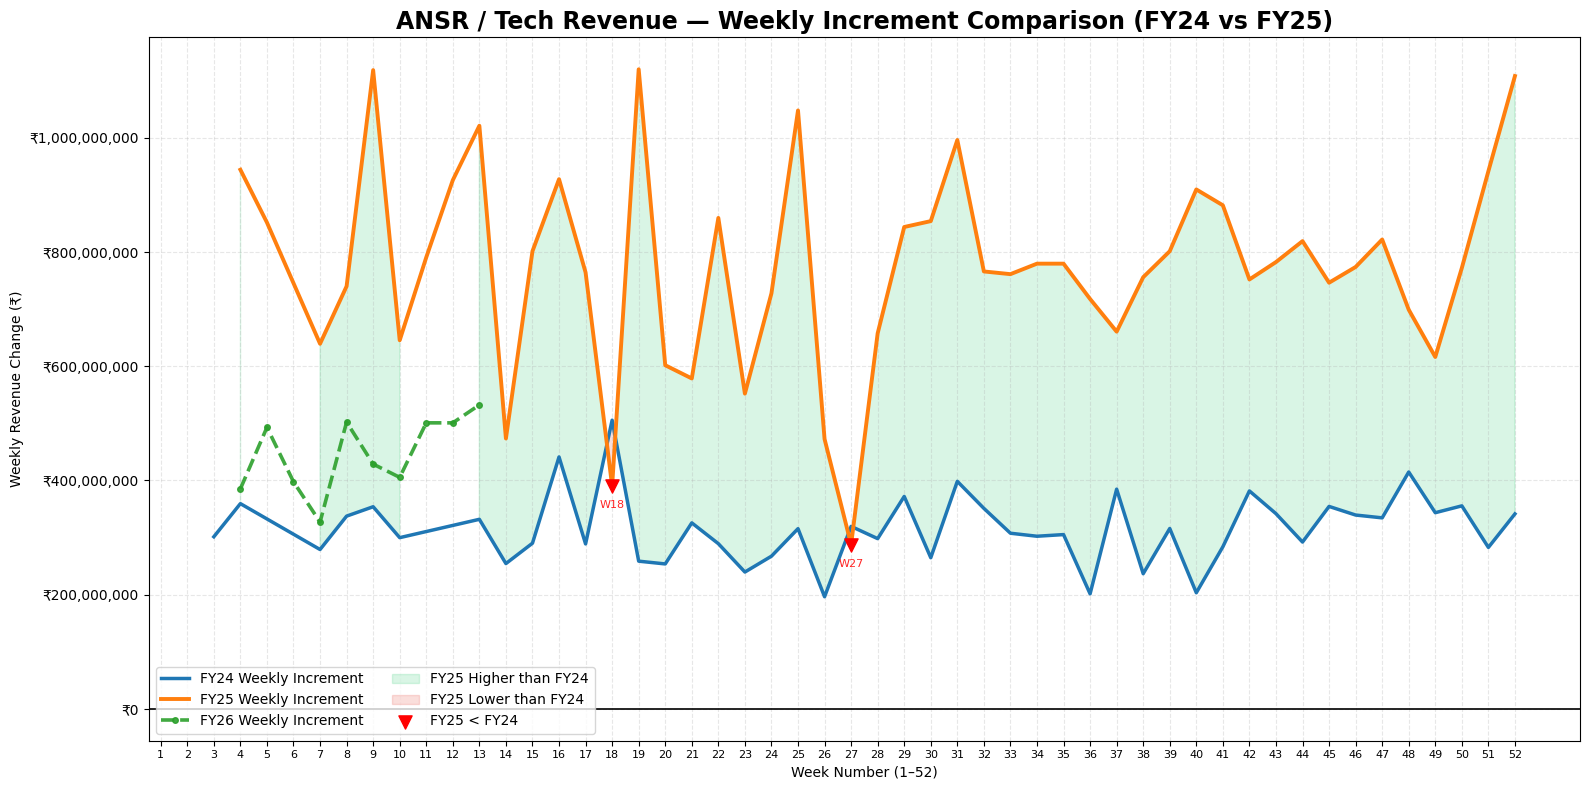

In [97]:
plt.figure(figsize=(16,8))

plt.plot(
    inc_plot_full["Week"],
    inc_plot_full["FY24_Weekly_Inc"],
    label="FY24 Weekly Increment",
    linewidth=2.5
)

plt.plot(
    inc_plot_full["Week"],
    inc_plot_full["FY25_Weekly_Inc"],
    label="FY25 Weekly Increment",
    linewidth=2.8
)


# ---------- FY26 Weekly Increment (partial year) ----------
plt.plot(
    inc_df["Week"],
    inc_df["FY26_Weekly_Inc"],
    label="FY26 Weekly Increment",
    linewidth=2.6,
    color="#2CA02C",        # professional green
    linestyle="--",         # visually distinct
    marker="o",
    markersize=4,
    alpha=0.9
)


plt.axhline(0, color="black", linewidth=1.2)

plt.fill_between(
    inc_plot["Week"],
    inc_plot["FY24_Weekly_Inc"],
    inc_plot["FY25_Weekly_Inc"],
    where=(inc_plot["FY25_Weekly_Inc"] > inc_plot["FY24_Weekly_Inc"]),
    interpolate=True,
    color="#2ecc71",   # soft green
    alpha=0.18,
    label="FY25 Higher than FY24"
)

plt.fill_between(
    inc_plot["Week"],
    inc_plot["FY24_Weekly_Inc"],
    inc_plot["FY25_Weekly_Inc"],
    where=(inc_plot["FY25_Weekly_Inc"] < inc_plot["FY24_Weekly_Inc"]),
    interpolate=True,
    color="#e74c3c",   # soft red
    alpha=0.18,
    label="FY25 Lower than FY24"
)
# 🔻 Indicator where FY25 drops below FY24
plt.scatter(
    underperf_weeks,
    underperf_values,
    color="red",
    marker="v",       # downward triangle
    s=90,
    zorder=5,
    label="FY25 < FY24"
)


plt.gca().yaxis.set_major_formatter(
    mtick.StrMethodFormatter("₹{x:,.0f}")
)

plt.title(
    "ANSR / Tech Revenue — Weekly Increment Comparison (FY24 vs FY25)",
    fontsize=17,
    weight="bold"
)

for w, v in zip(underperf_weeks, underperf_values):
    plt.text(
        w,
        v - 25_000_000,      # slight offset downward
        f"W{int(w)}",
        fontsize=8,
        color="red",
        ha="center",
        va="top",
        alpha=0.85
    )


plt.xlabel("Week Number (1–52)")
plt.ylabel("Weekly Revenue Change (₹)")
plt.xticks(range(1, 53), fontsize=8)
plt.grid(alpha=0.3, linestyle="--")
plt.legend(ncol=2)

plt.tight_layout()
plt.show()


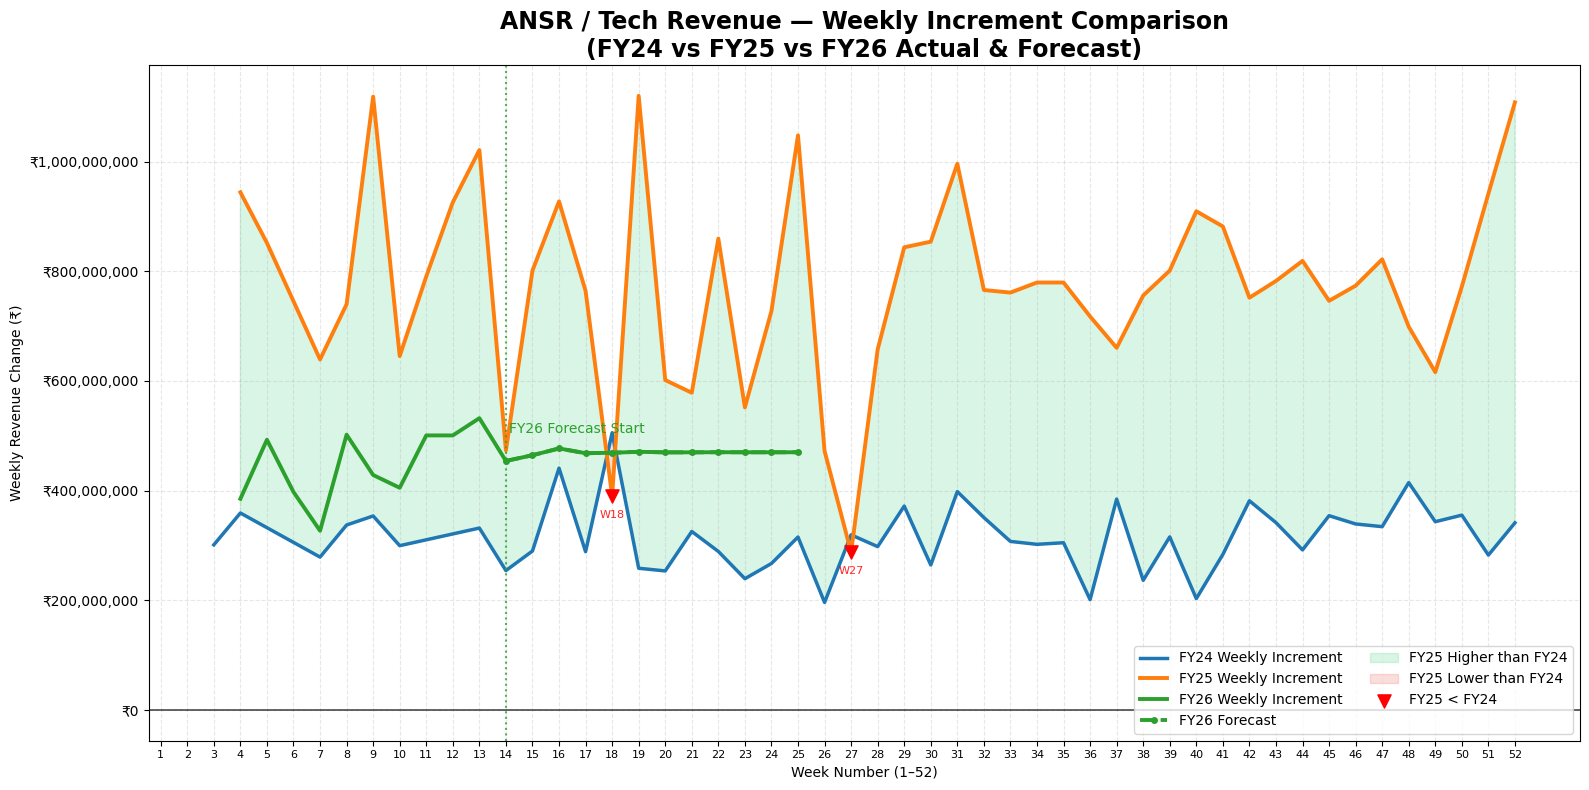

In [230]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# =========================
# Sort (safety)
# =========================
inc_plot_full = inc_plot_full.sort_values("Week")
inc_df_extended = inc_df_extended.sort_values("Week")

# =========================
# Plot
# =========================
plt.figure(figsize=(16, 8))

# ---------- FY24 ----------
plt.plot(
    inc_plot_full["Week"],
    inc_plot_full["FY24_Weekly_Inc"],
    label="FY24 Weekly Increment",
    linewidth=2.5,
    color="#1f77b4"
)

# ---------- FY25 ----------
plt.plot(
    inc_plot_full["Week"],
    inc_plot_full["FY25_Weekly_Inc"],
    label="FY25 Weekly Increment",
    linewidth=2.8,
    color="#ff7f0e"
)

# ---------- FY26 (CONTINUOUS BASE LINE) ----------
plt.plot(
    inc_df_extended["Week"],
    inc_df_extended["FY26_Weekly_Inc"],
    label="FY26 Weekly Increment",
    linewidth=2.8,
    color="#2CA02C"
)

# ---------- FY26 Forecast Styling (overlay only) ----------
plt.plot(
    inc_df_extended.loc[inc_df_extended["Week"] >= 14, "Week"],
    inc_df_extended.loc[inc_df_extended["Week"] >= 14, "FY26_Weekly_Inc"],
    linestyle="--",
    marker="o",
    markersize=4,
    linewidth=2.8,
    color="#2CA02C",
    label="FY26 Forecast"
)

# ---------- Zero baseline ----------
plt.axhline(0, color="black", linewidth=1.2, alpha=0.7)

# ---------- FY25 vs FY24 shading ----------
plt.fill_between(
    inc_plot_full["Week"],
    inc_plot_full["FY24_Weekly_Inc"],
    inc_plot_full["FY25_Weekly_Inc"],
    where=(inc_plot_full["FY25_Weekly_Inc"] > inc_plot_full["FY24_Weekly_Inc"]),
    interpolate=True,
    color="#2ecc71",
    alpha=0.18,
    label="FY25 Higher than FY24"
)

plt.fill_between(
    inc_plot_full["Week"],
    inc_plot_full["FY24_Weekly_Inc"],
    inc_plot_full["FY25_Weekly_Inc"],
    where=(inc_plot_full["FY25_Weekly_Inc"] < inc_plot_full["FY24_Weekly_Inc"]),
    interpolate=True,
    color="#e74c3c",
    alpha=0.18,
    label="FY25 Lower than FY24"
)

# ---------- Underperformance markers ----------
plt.scatter(
    underperf_weeks,
    underperf_values,
    color="red",
    marker="v",
    s=90,
    zorder=5,
    label="FY25 < FY24"
)

for w, v in zip(underperf_weeks, underperf_values):
    plt.text(
        w,
        v - 25_000_000,
        f"W{int(w)}",
        fontsize=8,
        color="red",
        ha="center",
        va="top",
        alpha=0.85
    )

# ---------- Forecast start marker ----------
plt.axvline(
    x=14,
    linestyle=":",
    color="#2CA02C",
    alpha=0.8
)
plt.text(
    14.1,
    inc_df_extended["FY26_Weekly_Inc"].max() * 0.95,
    "FY26 Forecast Start",
    color="#2CA02C",
    fontsize=10,
    ha="left"
)

# ---------- Formatting ----------
plt.gca().yaxis.set_major_formatter(
    mtick.StrMethodFormatter("₹{x:,.0f}")
)

plt.title(
    "ANSR / Tech Revenue — Weekly Increment Comparison\n(FY24 vs FY25 vs FY26 Actual & Forecast)",
    fontsize=17,
    weight="bold"
)

plt.xlabel("Week Number (1–52)")
plt.ylabel("Weekly Revenue Change (₹)")
plt.xticks(range(1, 53), fontsize=8)
plt.grid(alpha=0.3, linestyle="--")
plt.legend(ncol=2)
plt.tight_layout()
plt.show()


In [176]:
# Create a copy (DO NOT modify original)
inc_df_filled = inc_df.copy()

# Interpolate FY24 internal missing values only
inc_df_filled["FY24_Weekly_Inc"] = (
    inc_df_filled["FY24_Weekly_Inc"]
    .interpolate(method="linear", limit_area="inside")
)

# Optional: round for neatness
inc_df_filled["FY24_Weekly_Inc"] = inc_df_filled["FY24_Weekly_Inc"].round(2)


In [265]:
inc_df_filled.head(52)

,Week,FY24_Weekly_Inc,FY25_Weekly_Inc,FY26_Weekly_Inc,FY24_WoW_%,FY25_WoW_%,FY26_WoW_%
0,1,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,NaN,NaN,NaN,NaN
2,3,"301,237,630.02",NaN,NaN,NaN,NaN,NaN
3,4,"359,276,663.86","944,122,772.36","385,171,406.56",19.27,NaN,NaN
4,5,"332,483,894.08","851,710,894.78","492,856,071.23",-7.46,-9.79,27.96
5,6,"305,691,124.29","745,437,972.76","397,609,840.12",-8.06,-12.48,-19.33
6,7,"278,898,354.51","639,267,861.92","326,942,025.62",-8.76,-14.24,-17.77
7,8,"337,394,142.88","740,003,772.98","502,093,730.27",20.97,15.76,53.57
8,9,"353,831,096.53","1,118,573,541.38","428,544,965.57",4.87,51.16,-14.65
9,10,"299,681,967.06","645,393,550.26","405,280,929.92",-15.30,-42.30,-5.43


In [179]:
# Columns to calculate percentage change
fy_cols = ["FY24_Weekly_Inc", "FY25_Weekly_Inc", "FY26_Weekly_Inc"]

# Ensure numeric
inc_df_filled[fy_cols] = inc_df_filled[fy_cols].astype(float)

# Week-over-week percentage change
inc_df_filled["FY24_WoW_%"] = inc_df_filled["FY24_Weekly_Inc"].pct_change() * 100
inc_df_filled["FY25_WoW_%"] = inc_df_filled["FY25_Weekly_Inc"].pct_change() * 100
inc_df_filled["FY26_WoW_%"] = inc_df_filled["FY26_Weekly_Inc"].pct_change() * 100

# Round for clean reporting
inc_df_filled[["FY24_WoW_%", "FY25_WoW_%", "FY26_WoW_%"]] = (
    inc_df_filled[["FY24_WoW_%", "FY25_WoW_%", "FY26_WoW_%"]].round(2)
)


In [180]:
inc_df_filled.head(20)

,Week,FY24_Weekly_Inc,FY25_Weekly_Inc,FY26_Weekly_Inc,FY24_WoW_%,FY25_WoW_%,FY26_WoW_%
0,1,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,NaN,NaN,NaN,NaN
2,3,"301,237,630.02",NaN,NaN,NaN,NaN,NaN
3,4,"359,276,663.86","944,122,772.36","385,171,406.56",19.27,NaN,NaN
4,5,"332,483,894.08","851,710,894.78","492,856,071.23",-7.46,-9.79,27.96
5,6,"305,691,124.29","745,437,972.76","397,609,840.12",-8.06,-12.48,-19.33
6,7,"278,898,354.51","639,267,861.92","326,942,025.62",-8.76,-14.24,-17.77
7,8,"337,394,142.88","740,003,772.98","502,093,730.27",20.97,15.76,53.57
8,9,"353,831,096.53","1,118,573,541.38","428,544,965.57",4.87,51.16,-14.65
9,10,"299,681,967.06","645,393,550.26","405,280,929.92",-15.30,-42.30,-5.43


In [181]:
df.shape

(2986151, 24)

In [182]:
pd.set_option("display.max_columns", None)


In [185]:
inc_df.columns


Index(['Week', 'FY24_Weekly_Inc', 'FY25_Weekly_Inc', 'FY26_Weekly_Inc'], dtype='object')

In [186]:
# Combine WoW % from FY24 and FY25
wow_train = pd.concat([
    inc_df_filled["FY24_WoW_%"],
    inc_df_filled["FY25_WoW_%"]
], ignore_index=True)

# Clean
wow_train = wow_train.replace([np.inf, -np.inf], np.nan).dropna()
wow_train = wow_train / 100   # convert % → decimal


In [192]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

wow_model = SARIMAX(
    wow_train,
    order=(2, 0, 1),
    enforce_stationarity=True,
    enforce_invertibility=True
)


wow_fit = wow_model.fit(disp=False)
print("✅ WoW Trend Model Trained")


✅ WoW Trend Model Trained


In [193]:
n_steps = 12
wow_forecast = wow_fit.get_forecast(steps=n_steps)

wow_mean = wow_forecast.predicted_mean
wow_ci = wow_forecast.conf_int()


In [194]:
last_fy26_inc = inc_df_filled.loc[
    inc_df_filled["Week"] == 13, "FY26_Weekly_Inc"
].values[0]


In [195]:
predicted_inc = []
lower_inc = []
upper_inc = []

prev = last_fy26_inc

for m, lo, hi in zip(
    wow_mean,
    wow_ci.iloc[:, 0],
    wow_ci.iloc[:, 1]
):
    next_val = prev * (1 + m)
    predicted_inc.append(next_val)
    lower_inc.append(prev * (1 + lo))
    upper_inc.append(prev * (1 + hi))
    prev = next_val


In [196]:
prediction_table = pd.DataFrame({
    "Week": range(14, 14 + n_steps),
    "FY26_Predicted_Weekly_Inc": predicted_inc,
    "Lower_Bound": lower_inc,
    "Upper_Bound": upper_inc
})

prediction_table


,Week,FY26_Predicted_Weekly_Inc,Lower_Bound,Upper_Bound
0,14,"454,191,196.38","114,925,798.98","793,456,593.79"
1,15,"464,632,789.45","142,385,648.10","786,879,930.80"
2,16,"476,993,790.66","147,236,201.56","806,751,379.75"
3,17,"468,319,593.86","127,232,773.52","809,406,414.21"
4,18,"469,101,438.85","133,792,312.12","804,410,565.59"
5,19,"470,907,453.59","135,028,607.42","806,786,299.75"
6,20,"469,866,662.68","132,649,551.87","807,083,773.49"
7,21,"469,888,330.75","133,411,190.20","806,365,471.30"
8,22,"470,142,368.49","133,649,308.16","806,635,428.82"
9,23,"470,018,965.58","133,343,207.01","806,694,724.14"


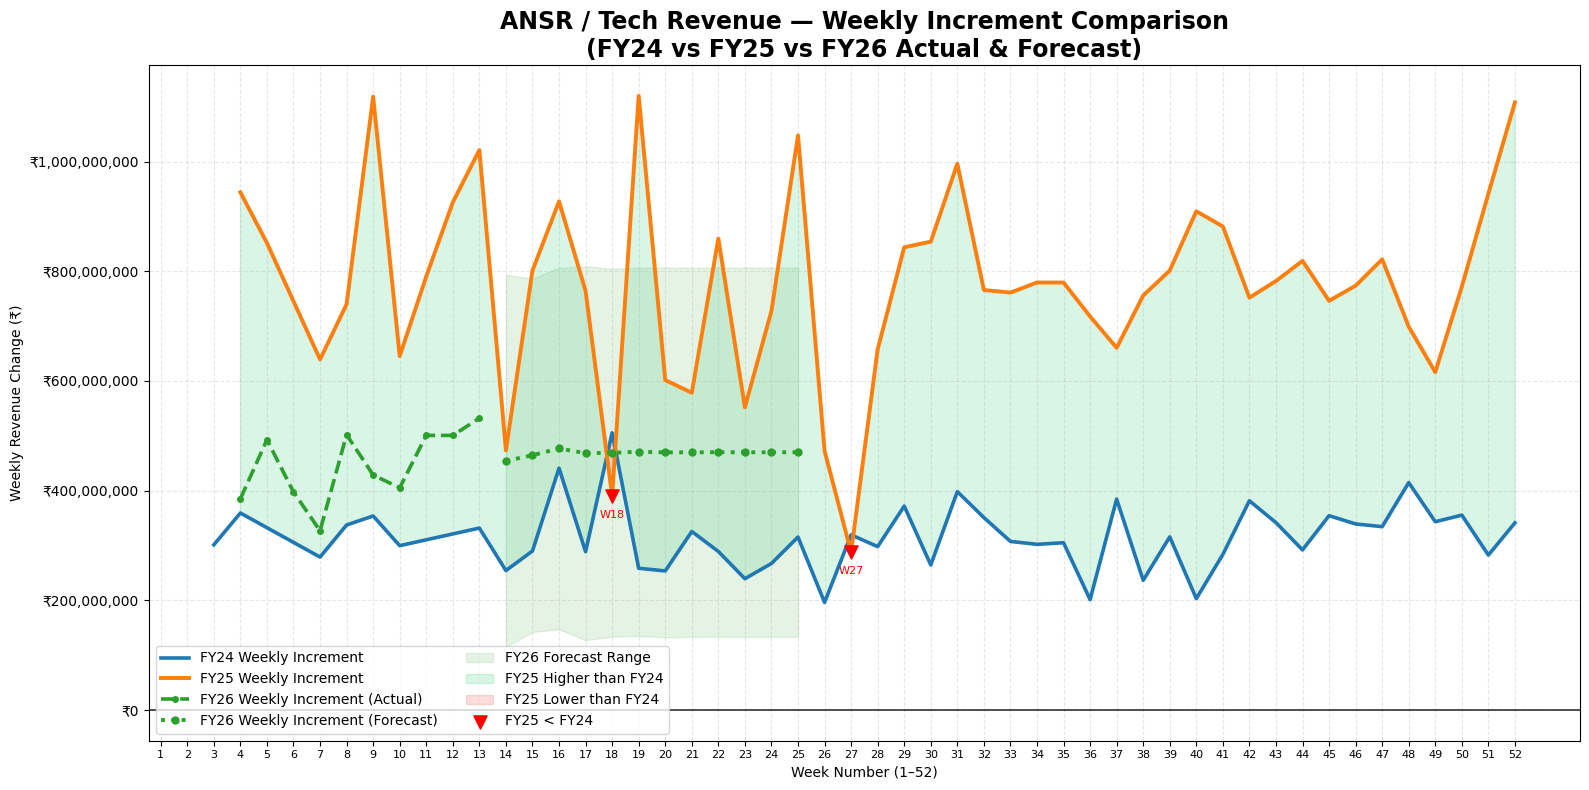

In [204]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import pandas as pd

# ===============================
# 1️⃣ Prepare prediction data
# ===============================
pred_df = prediction_table.copy()

pred_df["Week"] = pred_df["Week"].astype(int)

for col in ["FY26_Predicted_Weekly_Inc", "Lower_Bound", "Upper_Bound"]:
    pred_df[col] = pd.to_numeric(pred_df[col])

# ===============================
# 2️⃣ Identify FY25 underperformance vs FY24
# ===============================
underperf_mask = inc_plot_full["FY25_Weekly_Inc"] < inc_plot_full["FY24_Weekly_Inc"]

underperf_weeks = inc_plot_full.loc[underperf_mask, "Week"]
underperf_values = inc_plot_full.loc[underperf_mask, "FY25_Weekly_Inc"]

# ===============================
# 3️⃣ Plot
# ===============================
plt.figure(figsize=(16,8))

# ---------- FY24 ----------
plt.plot(
    inc_plot_full["Week"],
    inc_plot_full["FY24_Weekly_Inc"],
    label="FY24 Weekly Increment",
    linewidth=2.6,
    color="#1f77b4"
)

# ---------- FY25 ----------
plt.plot(
    inc_plot_full["Week"],
    inc_plot_full["FY25_Weekly_Inc"],
    label="FY25 Weekly Increment",
    linewidth=2.8,
    color="#ff7f0e"
)

# ---------- FY26 Actual (partial) ----------
plt.plot(
    inc_df["Week"],
    inc_df["FY26_Weekly_Inc"],
    label="FY26 Weekly Increment (Actual)",
    linewidth=2.6,
    color="#2CA02C",
    linestyle="--",
    marker="o",
    markersize=4
)

# ---------- FY26 Forecast ----------
plt.plot(
    pred_df["Week"],
    pred_df["FY26_Predicted_Weekly_Inc"],
    label="FY26 Weekly Increment (Forecast)",
    linewidth=2.8,
    color="#2CA02C",
    linestyle=":",
    marker="o",
    markersize=5
)

# ---------- Forecast confidence band ----------
plt.fill_between(
    pred_df["Week"],
    pred_df["Lower_Bound"],
    pred_df["Upper_Bound"],
    color="#2CA02C",
    alpha=0.12,
    label="FY26 Forecast Range"
)

# ---------- FY25 vs FY24 shading ----------
plt.fill_between(
    inc_plot_full["Week"],
    inc_plot_full["FY24_Weekly_Inc"],
    inc_plot_full["FY25_Weekly_Inc"],
    where=(inc_plot_full["FY25_Weekly_Inc"] > inc_plot_full["FY24_Weekly_Inc"]),
    interpolate=True,
    color="#2ecc71",
    alpha=0.18,
    label="FY25 Higher than FY24"
)

plt.fill_between(
    inc_plot_full["Week"],
    inc_plot_full["FY24_Weekly_Inc"],
    inc_plot_full["FY25_Weekly_Inc"],
    where=(inc_plot_full["FY25_Weekly_Inc"] < inc_plot_full["FY24_Weekly_Inc"]),
    interpolate=True,
    color="#e74c3c",
    alpha=0.18,
    label="FY25 Lower than FY24"
)

# ---------- Underperformance markers ----------
plt.scatter(
    underperf_weeks,
    underperf_values,
    color="red",
    marker="v",
    s=90,
    zorder=5,
    label="FY25 < FY24"
)

for w, v in zip(underperf_weeks, underperf_values):
    plt.text(
        w,
        v - 25_000_000,
        f"W{int(w)}",
        fontsize=8,
        color="red",
        ha="center",
        va="top"
    )

# ---------- Baseline ----------
plt.axhline(0, color="black", linewidth=1.2, alpha=0.8)

# ---------- Formatting ----------
plt.gca().yaxis.set_major_formatter(
    mtick.StrMethodFormatter("₹{x:,.0f}")
)

plt.title(
    "ANSR / Tech Revenue — Weekly Increment Comparison\n(FY24 vs FY25 vs FY26 Actual & Forecast)",
    fontsize=17,
    weight="bold"
)

plt.xlabel("Week Number (1–52)")
plt.ylabel("Weekly Revenue Change (₹)")
plt.xticks(range(1, 53), fontsize=8)
plt.grid(alpha=0.3, linestyle="--")

plt.legend(ncol=2, frameon=True)
plt.tight_layout()
plt.show()


In [216]:
prediction_table = prediction_table.copy()
prediction_table = prediction_table.rename(
    columns={"FY26_Predicted_Weekly_Inc": "FY26_Weekly_Inc_Pred"}
)


In [217]:
inc_df_extended = inc_df_filled.merge(
    prediction_table[["Week", "FY26_Weekly_Inc_Pred"]],
    on="Week",
    how="left"
)


In [218]:
inc_df_extended["FY26_Weekly_Inc"] = (
    inc_df_extended["FY26_Weekly_Inc"]
    .fillna(inc_df_extended["FY26_Weekly_Inc_Pred"])
)


In [219]:
inc_df_extended.drop(columns=["FY26_Weekly_Inc_Pred"], inplace=True)


In [220]:
inc_df_extended.loc[
    inc_df_extended["Week"].between(12, 18),
    ["Week", "FY26_Weekly_Inc"]
]


,Week,FY26_Weekly_Inc
11,12,"500,756,336.90"
12,13,"532,184,162.64"
13,14,"454,191,196.38"
14,15,"464,632,789.45"
15,16,"476,993,790.66"
16,17,"468,319,593.86"
17,18,"469,101,438.85"


In [222]:
inc_df_extended.head(52)

,Week,FY24_Weekly_Inc,FY25_Weekly_Inc,FY26_Weekly_Inc,FY24_WoW_%,FY25_WoW_%,FY26_WoW_%
0,1,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,NaN,NaN,NaN,NaN
2,3,"301,237,630.02",NaN,NaN,NaN,NaN,NaN
3,4,"359,276,663.86","944,122,772.36","385,171,406.56",19.27,NaN,NaN
4,5,"332,483,894.08","851,710,894.78","492,856,071.23",-7.46,-9.79,27.96
5,6,"305,691,124.29","745,437,972.76","397,609,840.12",-8.06,-12.48,-19.33
6,7,"278,898,354.51","639,267,861.92","326,942,025.62",-8.76,-14.24,-17.77
7,8,"337,394,142.88","740,003,772.98","502,093,730.27",20.97,15.76,53.57
8,9,"353,831,096.53","1,118,573,541.38","428,544,965.57",4.87,51.16,-14.65
9,10,"299,681,967.06","645,393,550.26","405,280,929.92",-15.30,-42.30,-5.43


In [233]:
last_actual_week = 13

last_fy26_fytd = (
    fytd_table.loc[fytd_table["Week"] == last_actual_week, "FY26 FYTD (₹)"]
    .values[0]
)

In [244]:
prediction_table.head(12)

,Week,FY26_Weekly_Inc_Pred,Lower_Bound,Upper_Bound
0,14,"454,191,196.38","114,925,798.98","793,456,593.79"
1,15,"464,632,789.45","142,385,648.10","786,879,930.80"
2,16,"476,993,790.66","147,236,201.56","806,751,379.75"
3,17,"468,319,593.86","127,232,773.52","809,406,414.21"
4,18,"469,101,438.85","133,792,312.12","804,410,565.59"
5,19,"470,907,453.59","135,028,607.42","806,786,299.75"
6,20,"469,866,662.68","132,649,551.87","807,083,773.49"
7,21,"469,888,330.75","133,411,190.20","806,365,471.30"
8,22,"470,142,368.49","133,649,308.16","806,635,428.82"
9,23,"470,018,965.58","133,343,207.01","806,694,724.14"


In [247]:
fytd_table.head(52)

,Week,FY24 FYTD (₹),FY25 FYTD (₹),FY26 FYTD (₹),FY24_Weekly_Inc,FY25_Weekly_Inc,FY26_Weekly_Inc
0,1,NaN,NaN,NaN,NaN,NaN,NaN
1,2,"595,146,955.74",NaN,NaN,NaN,NaN,NaN
2,3,"896,384,585.76","1,832,907,369.54","966,836,957.51","301,237,630.02",NaN,NaN
3,4,"1,255,661,249.62","2,777,030,141.90","1,352,008,364.07","359,276,663.86","944,122,772.36","385,171,406.56"
4,5,NaN,"3,628,741,036.68","1,844,864,435.29",NaN,"851,710,894.78","492,856,071.23"
5,6,"2,007,916,702.01","4,374,179,009.44","2,242,474,275.42",NaN,"745,437,972.76","397,609,840.12"
6,7,"2,286,815,056.52","5,013,446,871.36","2,569,416,301.04","278,898,354.51","639,267,861.92","326,942,025.62"
7,8,"2,624,209,199.40","5,753,450,644.34","3,071,510,031.32","337,394,142.88","740,003,772.98","502,093,730.27"
8,9,"2,978,040,295.93","6,872,024,185.72","3,500,054,996.89","353,831,096.53","1,118,573,541.38","428,544,965.57"
9,10,"3,277,722,262.99","7,517,417,735.98","3,905,335,926.80","299,681,967.06","645,393,550.26","405,280,929.92"


In [249]:
inc_df_extended.head(52)

,Week,FY24_Weekly_Inc,FY25_Weekly_Inc,FY26_Weekly_Inc,FY24_WoW_%,FY25_WoW_%,FY26_WoW_%,FY26_Weekly_Inc_Pred,FY26_Weekly_Inc_Final,FY26_FYTD_Extended
0,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,"301,237,630.02",NaN,NaN,NaN,NaN,NaN,NaN,NaN,"966,836,957.51"
3,4,"359,276,663.86","944,122,772.36","385,171,406.56",19.27,NaN,NaN,NaN,"385,171,406.56","1,352,008,364.07"
4,5,"332,483,894.08","851,710,894.78","492,856,071.23",-7.46,-9.79,27.96,NaN,"492,856,071.23","1,844,864,435.29"
5,6,"305,691,124.29","745,437,972.76","397,609,840.12",-8.06,-12.48,-19.33,NaN,"397,609,840.12","2,242,474,275.42"
6,7,"278,898,354.51","639,267,861.92","326,942,025.62",-8.76,-14.24,-17.77,NaN,"326,942,025.62","2,569,416,301.04"
7,8,"337,394,142.88","740,003,772.98","502,093,730.27",20.97,15.76,53.57,NaN,"502,093,730.27","3,071,510,031.32"
8,9,"353,831,096.53","1,118,573,541.38","428,544,965.57",4.87,51.16,-14.65,NaN,"428,544,965.57","3,500,054,996.89"
9,10,"299,681,967.06","645,393,550.26","405,280,929.92",-15.30,-42.30,-5.43,NaN,"405,280,929.92","3,905,335,926.80"


In [250]:
# Create clean FY26 FYTD dataframe
fy26_fytd_final = (
    inc_df_extended[["Week", "FY26_FYTD_Extended"]]
    .copy()
)

# Optional: keep only weeks where FYTD exists
fy26_fytd_final = fy26_fytd_final[
    fy26_fytd_final["FY26_FYTD_Extended"].notna()
]

# Rename column for clarity
fy26_fytd_final = fy26_fytd_final.rename(columns={
    "FY26_FYTD_Extended": "FY26 FYTD (Actual + Predicted)"
})

fy26_fytd_final.head(20)


,Week,FY26 FYTD (Actual + Predicted)
2,3,"966,836,957.51"
3,4,"1,352,008,364.07"
4,5,"1,844,864,435.29"
5,6,"2,242,474,275.42"
6,7,"2,569,416,301.04"
7,8,"3,071,510,031.32"
8,9,"3,500,054,996.89"
9,10,"3,905,335,926.80"
10,11,"4,406,112,201.64"
11,12,"4,906,868,538.54"


In [252]:
fytd_base = fytd_table[[
    "Week",
    "FY24 FYTD (₹)",
    "FY25 FYTD (₹)"
]].copy()


In [253]:
fytd_combined = (
    fy26_fytd_final
    .merge(
        fytd_base,
        on="Week",
        how="left"
    )
)


In [254]:
fytd_combined = fytd_combined[[
    "Week",
    "FY24 FYTD (₹)",
    "FY25 FYTD (₹)",
    "FY26 FYTD (Actual + Predicted)"
]]


In [255]:
fytd_combined.head(52)

,Week,FY24 FYTD (₹),FY25 FYTD (₹),FY26 FYTD (Actual + Predicted)
0,3,"896,384,585.76","1,832,907,369.54","966,836,957.51"
1,4,"1,255,661,249.62","2,777,030,141.90","1,352,008,364.07"
2,5,NaN,"3,628,741,036.68","1,844,864,435.29"
3,6,"2,007,916,702.01","4,374,179,009.44","2,242,474,275.42"
4,7,"2,286,815,056.52","5,013,446,871.36","2,569,416,301.04"
5,8,"2,624,209,199.40","5,753,450,644.34","3,071,510,031.32"
6,9,"2,978,040,295.93","6,872,024,185.72","3,500,054,996.89"
7,10,"3,277,722,262.99","7,517,417,735.98","3,905,335,926.80"
8,11,NaN,"8,308,101,513.86","4,406,112,201.64"
9,12,"3,916,949,577.39","9,233,925,336.06","4,906,868,538.54"
